# 12. Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

## 12.1 Data

In [2]:
#Generate dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=5.5, random_state=42)     

In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [4]:
X_train.shape

(800, 2)

## 12.2 Plots

In [5]:
sns.set_style("whitegrid")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


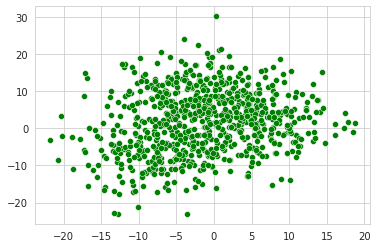

In [6]:
#Scatter plot of train dataset
sns.scatterplot(X_train.T[0], X_train.T[1],color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


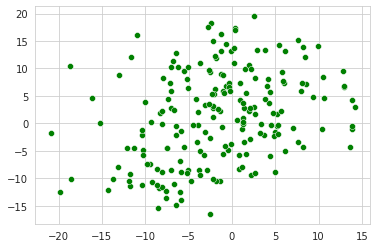

In [7]:
#Scatter plot of test dataset
sns.scatterplot(X_test.T[0], X_test.T[1],color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


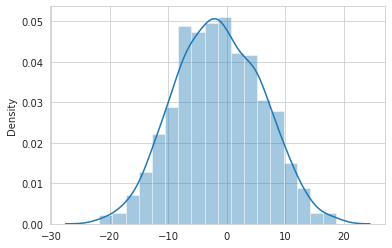

In [8]:
sns.distplot(X_train.T[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


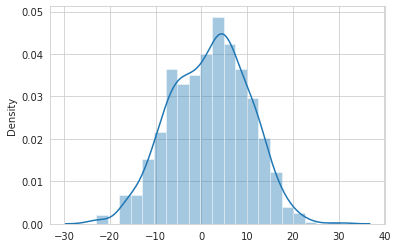

In [9]:
sns.distplot(X_train.T[1])

## 12.3 Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

## 12.4 Model

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=1)

In [12]:
model.fit(X_train_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 12.5 Score

In [13]:
# model score, Opposite of the value of X on the K-means objective.
print("Train score:", model.score(X_train_n))
print("Test score:",model.score(X_test_n))

Train score: -1600.000000000001
Test score: -375.1898042304475


In [14]:
train=[]
test=[]

for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n, y_train)
    
    train.append(model.score(X_train_n, y_train))
    test.append(model.score(X_test_n, y_test))

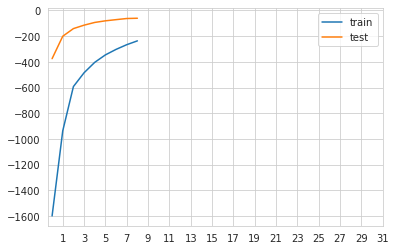

In [15]:
plt.plot(train)
plt.plot(test)
plt.legend(("train", "test"))
plt.xticks(range(1, 33, 2))
plt.show()

## 12.6 Elbow Method

In [16]:
# Create a list includes inertia for different k values

var = []
for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n)
    
    var.append(model.inertia_)    

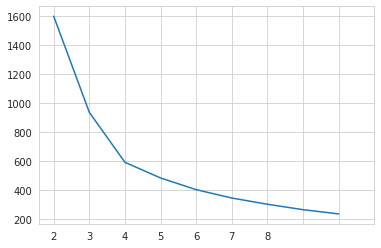

In [17]:
#Elbow Method
plt.plot(var)
plt.xticks(range(10), range(2,9))
plt.show()

Sihouette Score
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.  

1: Means clusters are well apart from each other and clearly distinguished.  

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.  

-1: Means clusters are assigned in the wrong way.

![](img/sil.jpeg)

Silhouette Score = $\frac{(b-a)}{max(a,b)}$

Where:  
$a$: average intra-cluster distance i.e the average distance between each point within a cluster.  
$b$: average inter-cluster distance i.e the average distance between all clusters.

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette = []

for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n)
    label=model.predict(X_train_n)
    silhouette.append(silhouette_score(X_train_n,label))

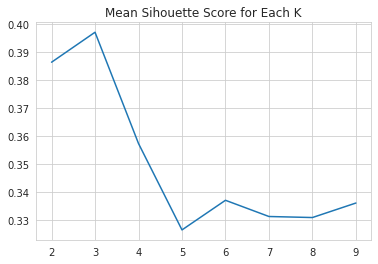

In [20]:
ax = plt.plot(silhouette)
plt.xticks(range(8), range(2,10))
plt.title("Mean Sihouette Score for Each K")
plt.show()

In [21]:
# Final run
model = KMeans(n_clusters=3,random_state=42)
model.fit(X_train_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
clusters = model.predict(X_train_n)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


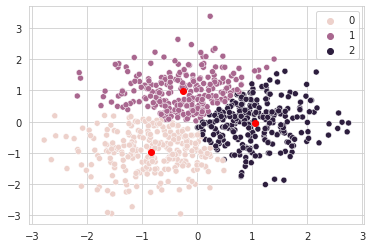

In [23]:
sns.scatterplot(X_train_n.T[0], X_train_n.T[1], hue=clusters)
plt.scatter(x=model.cluster_centers_[0][0], y=model.cluster_centers_[0][1], color='r')
plt.scatter(x=model.cluster_centers_[1][0], y=model.cluster_centers_[1][1], color='r')
plt.scatter(x=model.cluster_centers_[2][0], y=model.cluster_centers_[2][1], color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


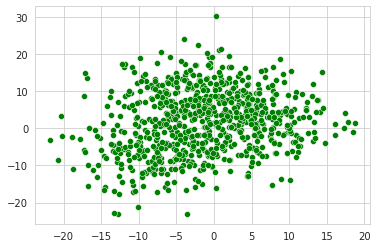

In [24]:
sns.scatterplot(X_train.T[0], X_train.T[1],color='g')

In [25]:
#Cluster Centers
model.cluster_centers_

array([[-0.84175757, -0.97962535],
       [-0.26104373,  0.98223569],
       [ 1.04528306, -0.02746083]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


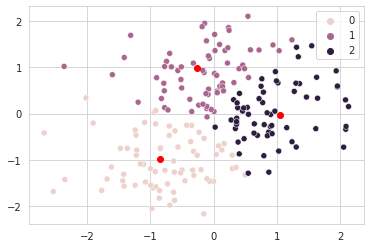

In [26]:
# Clusters on test dataset
cluster_test = model.predict(X_test_n)
sns.scatterplot(X_test_n.T[0], X_test_n.T[1], hue=cluster_test)
plt.scatter(x=model.cluster_centers_[0][0], y=model.cluster_centers_[0][1], color='r')
plt.scatter(x=model.cluster_centers_[1][0], y=model.cluster_centers_[1][1], color='r')
plt.scatter(x=model.cluster_centers_[2][0], y=model.cluster_centers_[2][1], color='r')

In [27]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering().fit(X_test_n)
agg.labels_

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1])